# Assignment: Linear and Logistic Regression

## 1. Business understanding

Real estate pricing is a critical factor for homebuyers, sellers, investors, and real estate agencies. Accurately predicting house prices can help stakeholders make informed decisions regarding property valuation, investment strategies, and market trends. The goal of this project is to develop predictive models for estimating real estate prices based on available features in the dataset.

In this assignment we construct two models:

- Linear Regression model: Predicts the continuous target variable to estimate real estate prices.
- Logistic Regression mode: Converts the target variable into a binary classification and predicts whether a house price falls into the higher or lower category.

#### Goals
- Identify most influential factors to real estate prices.
- Develop model that can accurately predict house prices.
- Compare the effectiveness of linear and logistic regression for this problem.

#### Our objectives
- to learn to use linear regression for predicting continuously varying target variables
- to learn to use logistic regression for binary classification
- to learn to estimate the relative importance of input features

## 2. Data understanding

In this assignment we used [Real Estate Valuation data set](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set) from UCI Machine Learning Repository. The data is collected from New Taipei City, Taiwan. The data has no missing values.

#### Variable information
The inputs are as follows

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

## 3. Data preparation

We import data from the UCI Repository and split it into training and testing sets.

In [46]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data with StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Plotting all features

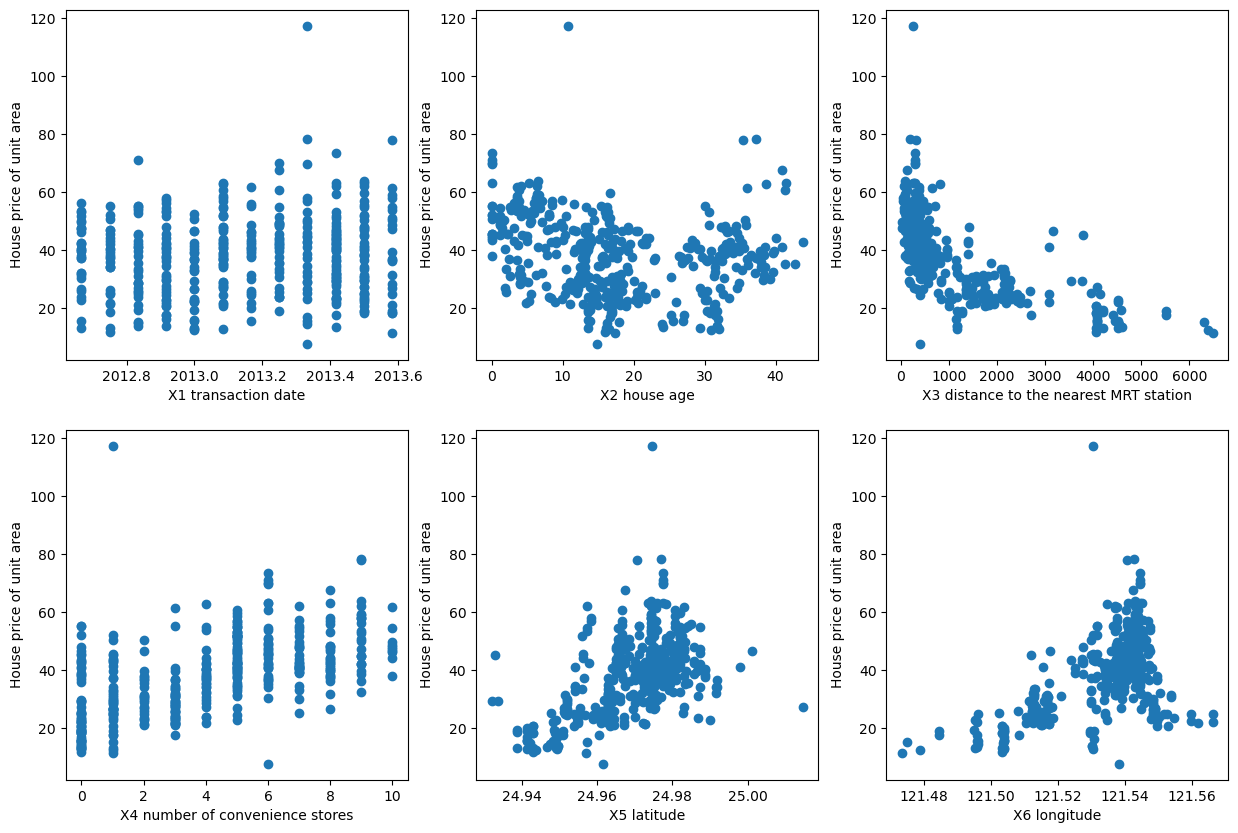

In [47]:
# check relationships between columns and price

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for index, column in enumerate(X.columns):
    axes[index].scatter(X[column], y)
    axes[index].set_xlabel(column)
    axes[index].set_ylabel('House price of unit area')

## 4. Modelling

We first try to fit data to LinearRegression model without scaling the data set. After examination of the results we scale the data set and fit the LinearRegression model with the scaled data set.

Machine learning methods used:
- Linear Regression -- for continuously varying target variables.
- Logistic Regression -- for binary classification.

#### Linear Regression (without scaling)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, confusion_matrix, \
    classification_report

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the house prices on the test set
predictions_not_scaled = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_not_scaled)
mae = mean_absolute_error(y_test, predictions_not_scaled)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
formatted_coefficients = ', '.join([f'{coef:.5f}' for coef in model.coef_[0]])
print("Coefficients: ", formatted_coefficients)
print("Intercept: ", model.intercept_)


Mean Squared Error: 53.50561912450351
Mean Absolute Error: 5.305355690074053
Coefficients:  5.44074, -0.27079, -0.00476, 1.09143, 229.04305, -29.49259
Intercept:  [-13044.23191716]


#### Linear Regression (with scaling)

Mean Squared Error: 53.50561912450208
Mean Absolute Error: 5.305355690074041
Coefficients:  1.52963, -3.06269, -5.78693, 3.21887, 2.85511, -0.44101
Intercept:  [38.39154079]


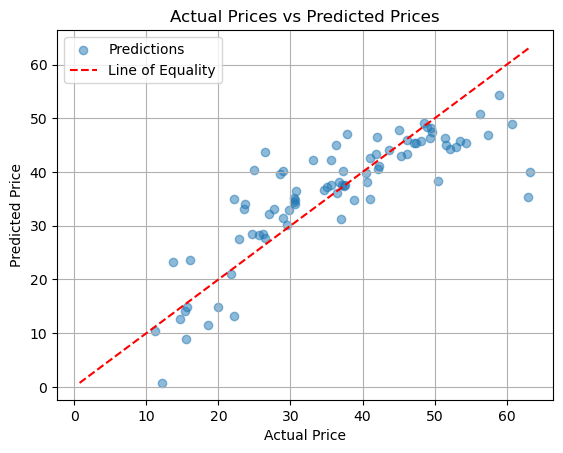

In [49]:
import numpy as np

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict the house prices on the test set
predictions_scaled = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_scaled)
mae = mean_absolute_error(y_test, predictions_scaled)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
formatted_coefficients = ', '.join([f'{coef:.5f}' for coef in model.coef_[0]])
print("Coefficients: ", formatted_coefficients)
print("Intercept: ", model.intercept_)

# Convert y_train and predictions dataset to numpy array
y_test_np = np.array(y_test).astype(float)
predictions_np = np.array(predictions_scaled).astype(float)

# Scatter plot of actual vs predicted prices
plt.scatter(y_test_np, predictions_np, alpha=0.5, label='Predictions')

# Plot the line of equality
max_val = max(max(y_test_np), max(predictions_np))
min_val = min(min(y_test_np), min(predictions_np))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Line of Equality')

# Labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


### Findings

lowest MSE and MAE values were achieved by having all the variables present.

Model was tested with:

- Dropping coordinates
- Dropping transaction date
- Dropping both coordinates and transaction date
- Combining the coordinates with PCA

All of the test listed above resulted in worse results than by keeping all the variables.

The absolute values of model.coef_ increase or decrease depending on scaling which makes it easier to compare feature importance.

Testing Linear Regression with and without scaling showed us that:

* MSE and MAE are identical for both models, indicating that scaling did not affect the overall prediction error. Coefficients differ significantly between models. With scaling the coefficients are standardized allowing easier comparison of the features.




## Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert target variable to binary: 1 if above average, 0 if below
y_binary = (y > y.mean()).astype(int).values.ravel()

# Data split with y as converted to binary
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Accuracy: 0.8160
Coefficients: [[ 0.21049086 -0.54956433 -2.55475202  0.56227936  1.20359401 -0.05317732]]
Intercept: [-0.46851706]


# 5. Evaluation

#### Findings in Linear Regression


- Lowest MSE and MAE values were achieved by having all the variables present.

- Model was tested with:

    - Dropping coordinates
    - Dropping transaction date
    - Dropping both coordinates and transaction date
    - Combining the coordinates with PCA

All of the test listed above resulted in worse results than by keeping all the variables.

The absolute values of model.coef_ increase or decrease depending on scaling which makes it easier to compare feature importance.

Testing Linear Regression with and without scaling showed us that:

* MSE and MAE are identical for both models, indicating that scaling did not affect the overall prediction error. Coefficients differ significantly between models. With scaling the coefficients are standardized allowing easier comparison of the features.

#### Findings in Logistic Regression

- Accuracy: The logistic regression model achieved an accuracy of 81.60%, indicating a good performance in classifying whether house prices fall into the higher or lower category.
- Coefficients provide insight into which features are most influential in determining the possibility of higher house prices. In this case it is the Distance to MRT station.

### Cross-validation

- Cross validation for Logistic Regression model and confusion matrix.


Accuracy: 0.85
Confusion Matrix:
 [[100  29]
 [ 13 147]]


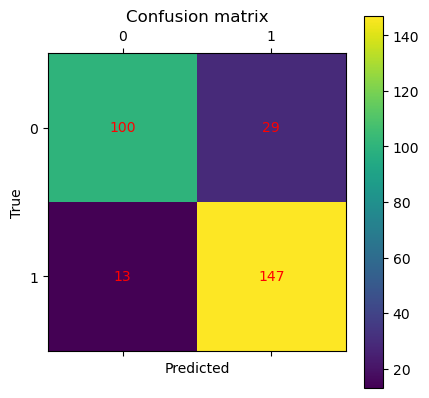

Validation report:               precision    recall  f1-score   support

           0       0.88      0.78      0.83       129
           1       0.84      0.92      0.88       160

    accuracy                           0.85       289
   macro avg       0.86      0.85      0.85       289
weighted avg       0.86      0.85      0.85       289



In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = cross_val_predict(estimator=reg, X=X_train_scaled, y=y_train, cv=10)

cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True')
plt.xlabel('Predicted')

# Construct validation report
validation_report = classification_report(y_train, y_pred)

# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print('Validation report:', validation_report)


### Estimating feature importance with permutation importance

- Here we see the impact of each feature on the models performance.

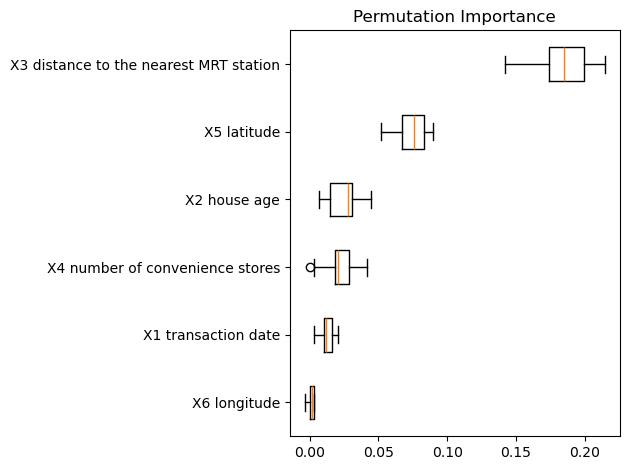

In [52]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X_train_scaled, y_train, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=df.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

# 6. Conclusion

The linear regression model effectively predicts house prices based on the given features. The model's performance was evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE), which showed that including all variables resulted in the best performance. Scaling the data did not affect the overall prediction error but allowed for easier comparison of feature importance. This model can be a valuable tool for real estate stakeholders to estimate property values accurately, aiding in informed decision-making and strategic planning.


The logistic regression model performs well in predicting whether house prices fall into the higher or lower category. This model can be a valuable tool for real estate agents to estimate house values quickly and accurately, leading to more efficient processes and potentially higher customer satisfaction and revenue.